In [48]:
import importlib
import graphviz
import graph
importlib.reload(graph)



<module 'graph' from '/home/nemo/Graph_Game_Design/graph.py'>

In [33]:
def visualize(g: graph.Graph) -> graphviz.Graph:
    if isinstance(g, graph.Graph):
        dot = graphviz.Graph()
        drawn = set()
        for ni in g.nodes:
            drawn.add(ni)
            dot.node(ni)
            #print(list((ni, nj) for nj in g.edges[ni]))
            dot.edges((ni,nj) for nj in g.edges[ni] if nj in drawn)
        return dot

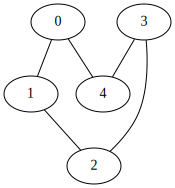

In [34]:
import itertools 

g = graph.Graph()
for i in range(5):
    g.node(str(i))
for i,j in zip(range(0,4), range(1,5)):
    g.edge(str(i),str(j))
g.edge("4", "0")
visualize(g)

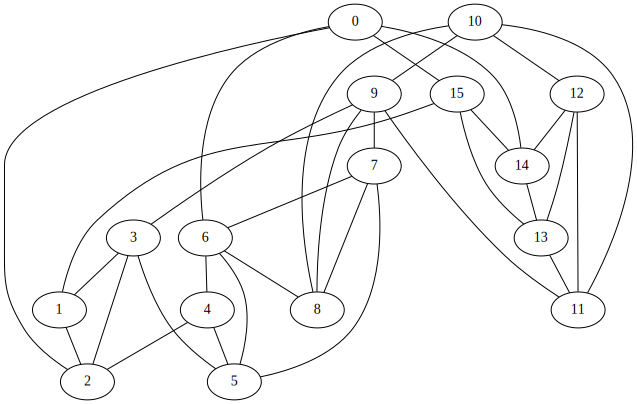

In [50]:
visualize(graph.randomWSGraph(link_rewiring_prob=0.1))